In [24]:
""" Importar las librerias necesarias """
#Libreria matematica
import numpy as np
#Libreria panda manipular datos
import pandas  as pd
#Librerias gráficas
import matplotlib.pyplot as plt

import seaborn as sb
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#Libreria de aprendizaje automatico
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#Parametros para la gráfica
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [2]:
#Leer la base de datos
dataframe = pd.read_csv("articulos_ml.csv")
dataframe

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


In [3]:
#Obtener la cantida de columas y de filas

dataframe.shape
#El resultado era (161,8)

(161, 8)

In [4]:
#Estadisticas básicas de la data
dataframe.describe()

#1808 Es la cantidad media de palabras
#250 es el min y 8401 es el mayor


,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


### Analisis de la cantidad de palabras del articulo vs las veces que fue compartido.

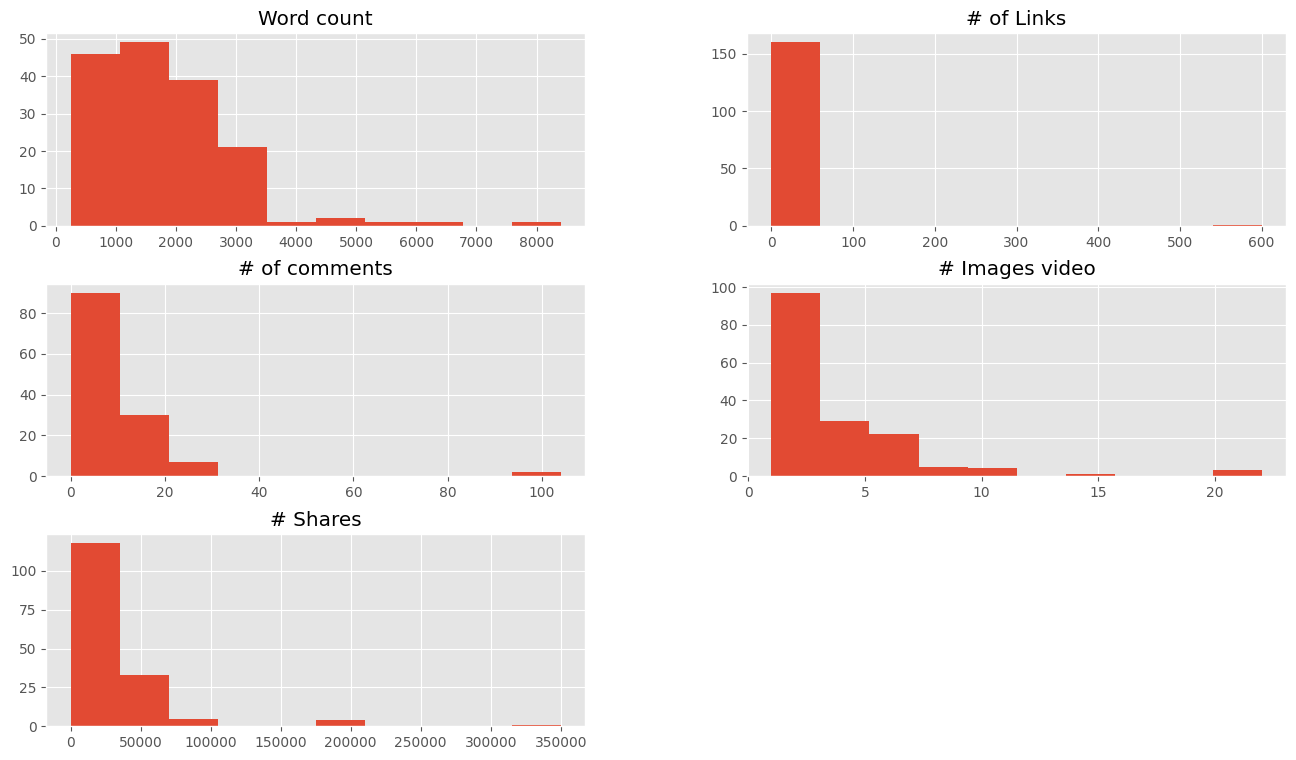

In [14]:
#Sacar datos del dataframe
dataframe.drop(['Title','url','Elapsed days'],axis=1).hist()
plt.show()

### Gráficaremos la tendencia de los datos (puntos)

- Dividiremos los colores de acuerdo a la media 1808

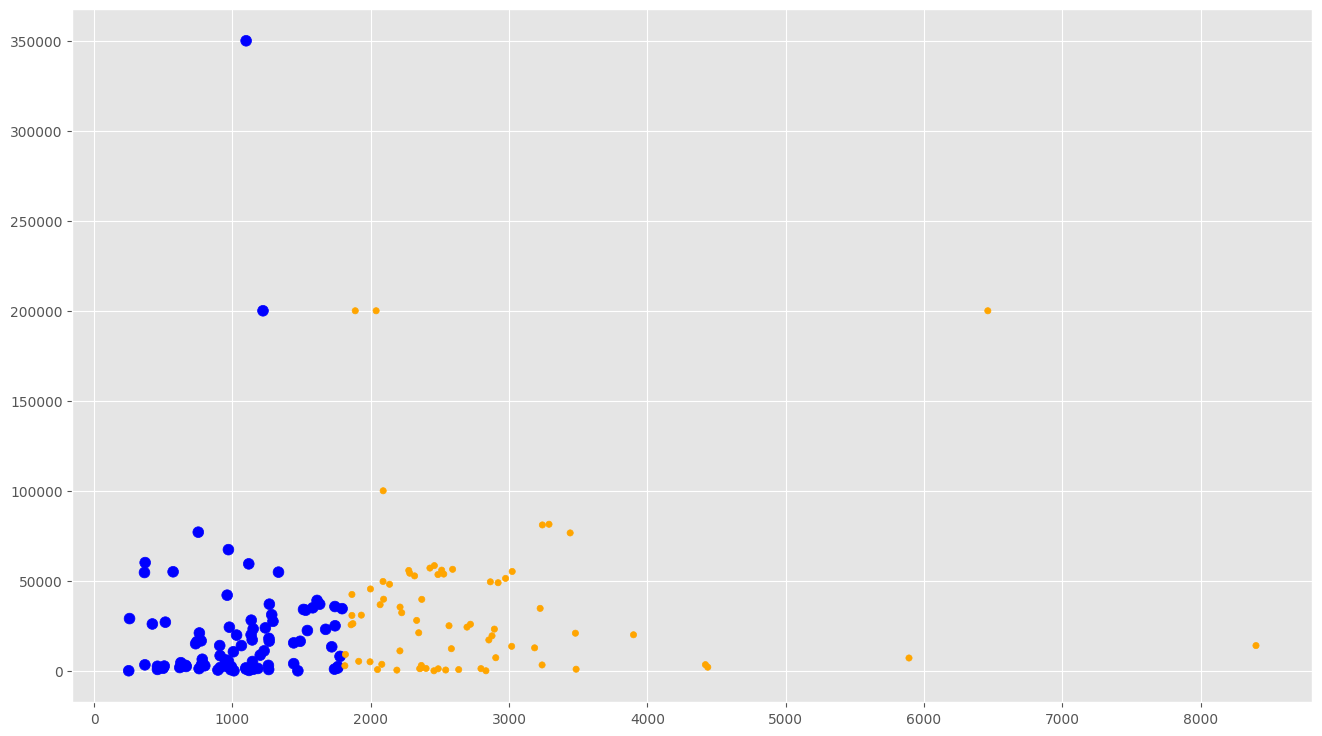

In [21]:
#Colores para los puntos
colores = ['orange', 'blue']

f1 = dataframe['Word count'].values #Cantida de palabras
f2 = dataframe['# Shares'].values #Veces que fue compartido
tamano = [20,60]

asignarColor = []
asignarTamano = []
for index, row in dataframe.iterrows():
    if (row['Word count']>1808):
        asignarColor.append(colores[0]) #Asignar color naranjo
        asignarTamano.append(tamano[0])
    else:
        asignarColor.append(colores[1]) #Asignar color azul
        asignarTamano.append(tamano[1])

#Graficamos        
plt.scatter(f1,f2, c=asignarColor, s=asignarTamano)
#Mostrar el gráfico
plt.show()
        


## Hay datos atipicos

- Filtrar los datos que son atipicos, para obtener un mejor resultado

- Eje X: 0 al 3500
- Eje Y: 0 al 80000

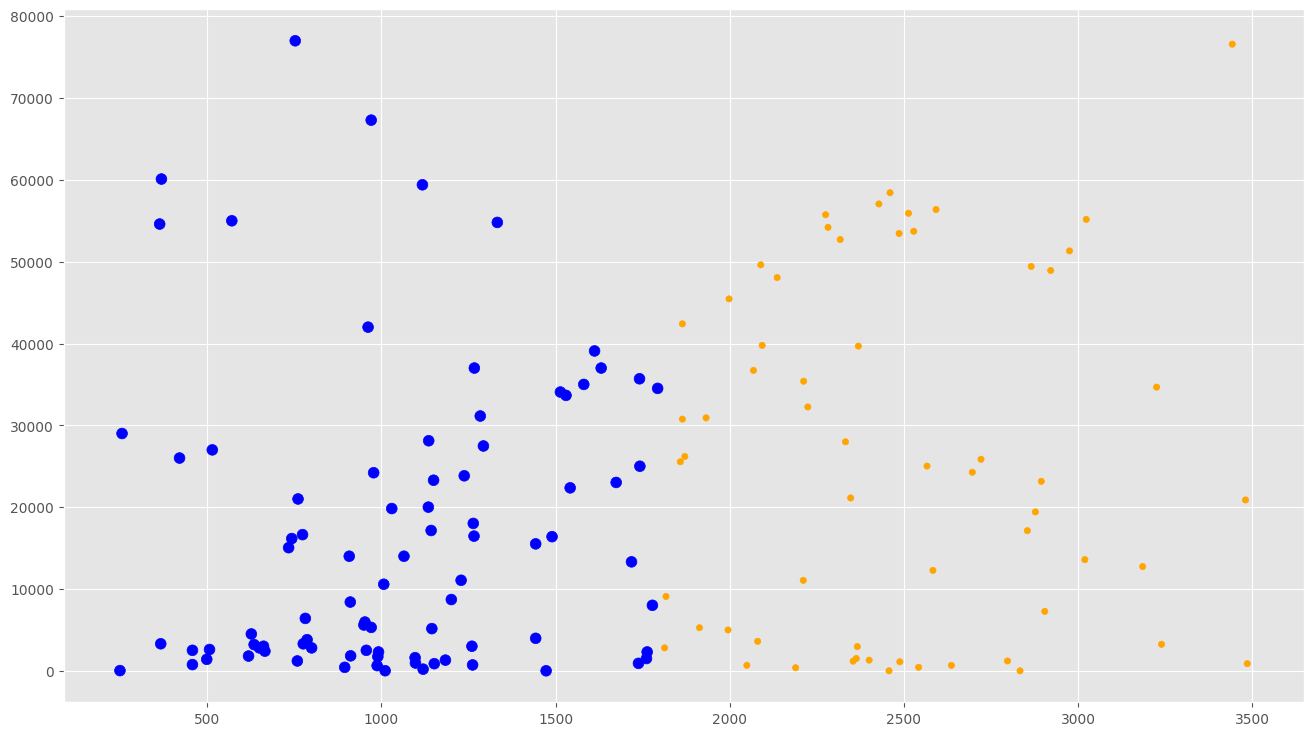

In [22]:

dataframe_filtred = dataframe[(dataframe['Word count']<=3500) & (dataframe['# Shares']<=80000)]

#Colores para los puntos
colores = ['orange', 'blue']

f1 = dataframe_filtred['Word count'].values #Cantida de palabras
f2 = dataframe_filtred['# Shares'].values #Veces que fue compartido
tamano = [20,60]

asignarColor = []
asignarTamano = []
for index, row in dataframe_filtred.iterrows():
    if (row['Word count']>1808):
        asignarColor.append(colores[0]) #Asignar color naranjo
        asignarTamano.append(tamano[0])
    else:
        asignarColor.append(colores[1]) #Asignar color azul
        asignarTamano.append(tamano[1])

#Graficamos        
plt.scatter(f1,f2, c=asignarColor, s=asignarTamano)
#Mostrar el gráfico
plt.show()

In [23]:
# Estadistica basica de los datos filtrados
dataframe_filtred.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


### Regresión lineal (1 variable)


In [27]:
dataX = dataframe_filtred[['Word count']]
x_train = np.array(dataX)
y_train = dataframe_filtred['# Shares'].values

#Crear el objeto del RL
regr = linear_model.LinearRegression()

#Entrenar
regr.fit(x_train, y_train)

#predecir
y_pred = regr.predict(x_train)

#Evaluar el modelo
print('Coeficiente: \n', regr.coef_)
print('Corte en el eje Y: \n', regr.intercept_)
print('Error cuadrado medio: %.2f \n' % mean_squared_error(y_train, y_pred))
print('Puntaje de varianza: %.2f'% r2_score(y_train, y_pred))



Coeficiente: 
 [5.69765366]
Corte en el eje Y: 
 11200.30322307416
Error cuadrado medio: 372888728.34 

Puntaje de varianza: 0.06


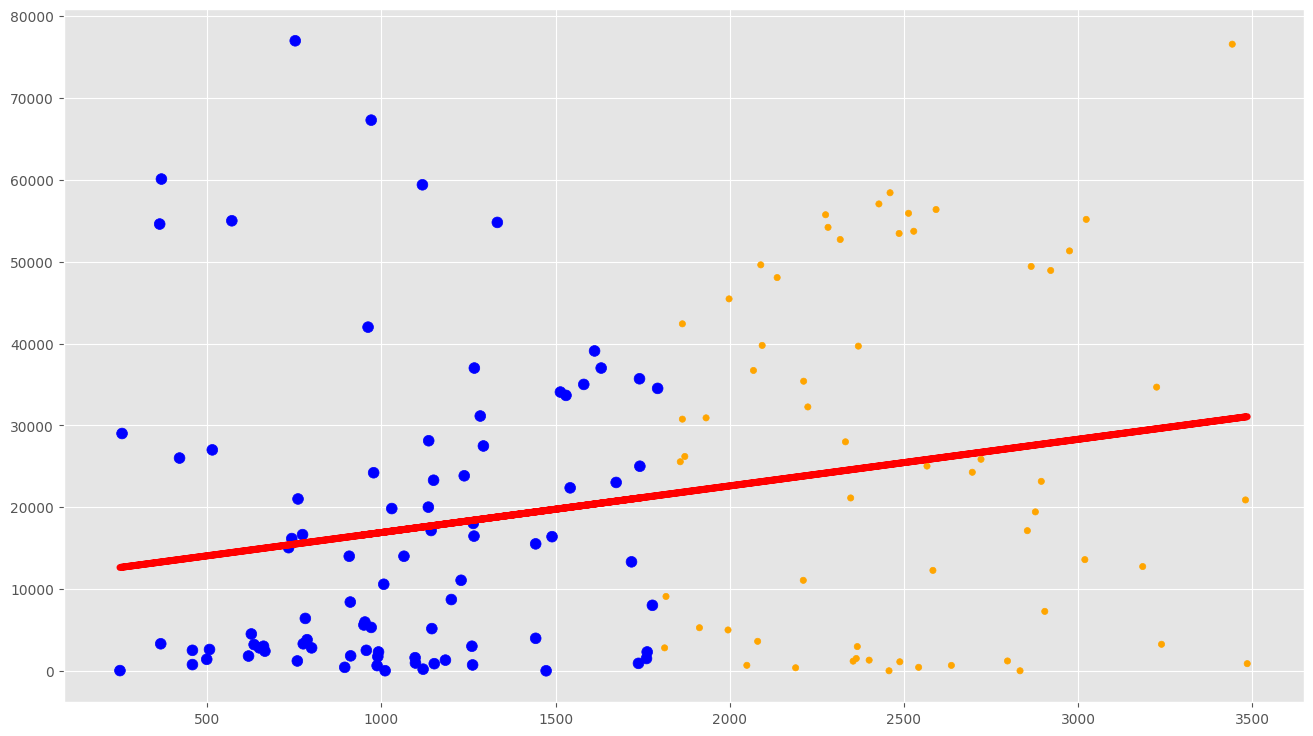

In [37]:
plt.scatter(x_train[:,0], y_train, c=asignarColor, s =asignarTamano)
plt.plot(x_train[:,0], y_pred, color='red', linewidth=5)
plt.show()

In [38]:
#Probar la predicción

y_DosMil = regr.predict([[2000]])
print(int(y_DosMil))

22595


C:\Users\Casa\AppData\Local\Temp\ipykernel_7720\1390651700.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_DosMil))


# Tarea

## Probar si alguno de los otros campos seria una buena opción para la RL.